
# **Association Rules**

Association Rules Analysis has become familiar for analysis in the retail industry. It is also called Market Basket Analysis terms. This analysis is also used for advice. Personal recommendations in applications such as Spotify, Netflix, and Youtube can be given as examples. 
[](http://)
One of the biggest examples of Association Rules Analysis is the correlation between beer and diaper. When Walmart, a chain store in the United States, studied the shopping behavior of customers, the study showed that diapers and beers are bought together. Because, as it turns out, fathers are often tasked with shopping while mothers stay with the baby.


# **Apriori Algorithm**

The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts. These algorithm properties and data are evaluated with Boolean Association Rules. In this algorithm, there are product clusters that pass frequently, and then strong relationships between these products and other products are sought.

The importance of an Association Rules can be determined by 3 parameters that are used to identify the strength of the algorithm. Namely,

* Support
* Confidence
* Lift


Let X and Y represent the products in the market and N represents the total number of products.


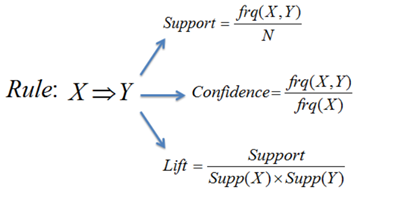


**Support**     :  It is the probability of an event to occur.

**Confidence**  :  It is a measure of conditional probability

**Lift**        : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.



**Import the Libraries and Dataset**

The first step, as always, is to import the required libraries.    
In the script below I import pandas, numpy, and apriori libraries.



In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


Let's examine the shape of the data set,

In [3]:
df.shape

(20, 1)

Let's split the products and create a list called by 'data',

In [4]:
data = list(df["products"].apply(lambda x:x.split(",") ))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

**Apriori Algorithm and One-Hot Encoding**
 
Apriori's algorithm transforms True/False or 1/0.  
Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list.  
Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.


In [5]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Applying Apriori and Resulting**

The next step is to create the Apriori Model. We can change all the parameters in the Apriori Model in the mlxtend package.   
I will try to use minimum support parameters for this modeling.    
For this, I set a min_support value with a threshold value of 20% and printed them on the screen as well.
 

In [7]:
#set a threshold value for the support value and calculate the support value.
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df

Processing 42 combinations | Sampling itemset size 3


,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


I chose the 60% minimum confidence value.
In other words, when product X is purchased, we can say that the purchase of product Y is 60% or more.

In [8]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


For example, if we examine our 1st index value;
* The probability of seeing sugar sales is seen as 30%.
* Bread intake is seen as 65%.
* We can say that the support of both of them is measured as 20%.
* 67% of those who buys sugar, buys bread as well.
* Users who buy sugar will likely consume 3% more bread than users who don't buy sugar.
* Their correlation with each other is seen as 1.05.
 

As a result, if item X and Y are bought together more frequently, then several steps can be taken to increase the profit. For instance:
 
* 	Cross-Selling can be improved by combining products - items
* 	The shop layout can be changed so that sales can be improved when certain items are kept together. 
* 	Promotional activities which are an advertising campaign can be carried out to increase the sales of goods that customers do not buy.
* 	Collective discounts can be offered on these products if the customer buys both of them.
 
 
 
 
